In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

from numba import njit

from num_opt.algorithms import bracketing
from num_opt.plot import logger
%matplotlib notebook

In [2]:
@njit
def f(x):
    return x*(x-1)*(x+2.5)*(x-3)

<IPython.core.display.Javascript object>


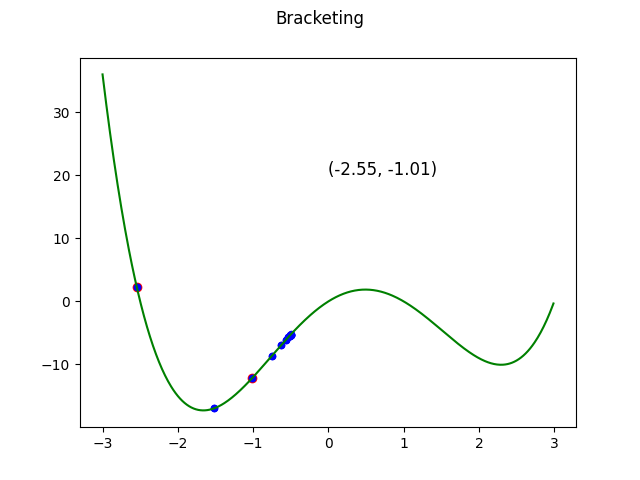

In [10]:
## Bracketing

fig, ax = plt.subplots()
x = np.arange(-3, 3, 0.01)
y = f(x)

r, x_hist, y_hist = logger(bracketing.bracket)(f, x0 = -0.5)

x_ani, y_ani = [],[]
ax.plot(x, y, c = 'g')
ax.scatter(r, (f(r[0]), f(r[1])), c = 'r')
sc = ax.scatter(x_ani,y_ani, s = 20, c = 'b')

plt.text(0, 20, '({:.2f}, {:.2f})'.format(r[0], r[1]), fontsize=12)
fig.suptitle('Bracketing')
def animate(i):
    global x_ani, y_ani
    if i == 0:
        x_ani, y_ani = [], []
    if i < len(x_hist):
        x_ani.append(x_hist[i])
        y_ani.append(y_hist[i])
        sc.set_offsets(np.c_[x_ani,y_ani])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=len(x_hist) + 10, interval=200, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


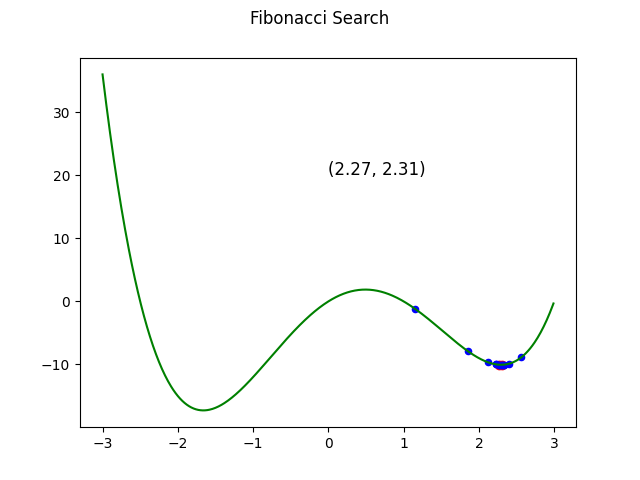

In [13]:
## Fibonacci Search
fig, ax = plt.subplots()
x = np.arange(-3, 3, 0.01)
y = f(x)

r, x_hist, y_hist = logger(bracketing.fibonacci_search)(f, a = 0, b = 3, n = 10)

x_ani, y_ani = [],[]
ax.plot(x, y, c = 'g')
ax.scatter(r, (f(r[0]), f(r[1])), c = 'r')
sc = ax.scatter(x_ani,y_ani, s = 20, c = 'b')

plt.text(0, 20, '({:.2f}, {:.2f})'.format(r[0], r[1]), fontsize=12)
fig.suptitle('Fibonacci Search')
def animate(i):
    global x_ani, y_ani
    if i == 0:
        x_ani, y_ani = [], []
    if i < len(x_hist):
        x_ani.append(x_hist[i])
        y_ani.append(y_hist[i])
        sc.set_offsets(np.c_[x_ani,y_ani])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=len(x_hist) + 10, interval=200, repeat=True)
plt.show()